# Implementation of Gene Classification

1. Using Random Forest as a classifier
2. Using ANOVA as Feature Selction Technique (scikit-learn's f_classif)
3. Using KFold Cross Validation
4. Encoding of categorical labels: LabelEncoder

In [1]:
import pandas as pd
import time as t
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import KFold, cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [2]:
#loading the data as a pandas dataframe
data = pd.read_csv('RNAnew.gz', compression='gzip')
#print (data.info())

C:\Users\Asus\Anaconda3\envs\testenv\lib\site-packages\IPython\core\interactiveshell.py:3062: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
data.head()

,TCGA-PANCAN-HiSeq-801x20531/,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [4]:
data.shape

(1604, 20532)

In [5]:
data[800:1604]

,TCGA-PANCAN-HiSeq-801x20531/,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
800,sample_800,0.0,2.325242,3.805932,6.530246,9.560367,0.0,7.957027,0.0,0.0,...,6.403075,8.594354,10.243079,9.139459,10.102934,11.641081,10.607358,9.844794,4.550716,0.0
801,NaN,Class,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
802,sample_0,PRAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
803,sample_1,LUAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
804,sample_2,PRAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1599,sample_797,LUAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1600,sample_798,COAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1601,sample_799,PRAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1602,sample_800,PRAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data[0:800]

,TCGA-PANCAN-HiSeq-801x20531/,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000
1,sample_1,0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000
2,sample_2,0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000
3,sample_3,0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000
4,sample_4,0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,sample_795,0.436588,4.472176,4.908746,5.937848,9.330901,0.0,7.254944,0.429107,0.0,...,6.024397,8.965421,10.707558,5.435152,10.475561,10.961247,10.203226,10.030005,3.675703,0.000000
796,sample_796,0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,...,6.088133,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000
797,sample_797,0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,...,6.371876,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000
798,sample_798,0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,...,5.719386,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693


In [7]:
#extracting target labels
labels = data[['gene_0']]

In [8]:
labels.head()

,gene_0
0,0
1,0
2,0
3,0
4,0


In [9]:
labels = labels[802:1603]

In [10]:
labels.head()

,gene_0
802,PRAD
803,LUAD
804,PRAD
805,PRAD
806,BRCA


In [11]:
labels.tail()

,gene_0
1598,BRCA
1599,LUAD
1600,COAD
1601,PRAD
1602,PRAD


In [12]:
labels.shape

(801, 1)

In [13]:
#preparing the data
#Remove column 'gene_0' as it contain target labels
df1 = data.drop('gene_0', axis=1)

In [14]:
df1.head()

,TCGA-PANCAN-HiSeq-801x20531/,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [15]:
df1.shape

(1604, 20531)

In [16]:
df = df1.iloc[:801]
#df now contains only the features columns

In [17]:
df.shape

(801, 20531)

In [18]:
df.head()

,TCGA-PANCAN-HiSeq-801x20531/,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [19]:
df.tail()

,TCGA-PANCAN-HiSeq-801x20531/,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
796,sample_796,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,0.0,...,6.088133,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000
797,sample_797,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,0.0,...,6.371876,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000
798,sample_798,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,0.0,...,5.719386,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693
799,sample_799,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,0.0,...,5.785237,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000
800,sample_800,2.325242,3.805932,6.530246,9.560367,0.0,7.957027,0.000000,0.0,0.0,...,6.403075,8.594354,10.243079,9.139459,10.102934,11.641081,10.607358,9.844794,4.550716,0.000000


In [20]:
#Remove the column 'TCGA-PANCAN-HiSeq-801x20531/' as it only contains the sample number and it is not needed for training
df=df.drop('TCGA-PANCAN-HiSeq-801x20531/', axis=1)

In [21]:
df.head()

,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,0.591871,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,0.000000,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,0.000000,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,0.000000,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,0.000000,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [22]:
#instantiate StandardScaler
scaler = StandardScaler()

In [23]:
#scaling the data
scaler.fit(df)

StandardScaler()

In [24]:
scaled_features = scaler.transform(df)

In [25]:
classifier = RandomForestClassifier(n_jobs=2, random_state=0)

In [26]:
#Encoding the categorical target labels
le = preprocessing.LabelEncoder()
le.fit(labels)
le.classes_

C:\Users\Asus\Anaconda3\envs\testenv\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array(['BRCA', 'COAD', 'KIRC', 'LUAD', 'PRAD'], dtype=object)

In [27]:
y=le.transform(labels)

In [28]:
y.shape

(801,)

In [29]:
#finding the optimal k value (optimal number of features that we need) by comparing the accuracy for each k

results = []

for i in range(1,41):
    fs = SelectKBest(score_func=f_classif, k=i)
    dfnew = fs.fit_transform(scaled_features, y)
    kfold = KFold(n_splits=10)
    results.append(cross_val_score(classifier, dfnew, y, cv=kfold))

C:\Users\Asus\Anaconda3\envs\testenv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [    4    22  4369  4807  4808  4813  4815  4816  4830  5287  7660  7661
  7662  7663  7664  8120  9303  9305  9313  9315  9319  9451 10120 11957
 13990 14157 14158 14160 15137 15139 15140 15445 16565 16567 16568 16570
 16574 16577 16578 16603 16633 16636 16676 16696 16697 16698 16699 16700
 16701 16703 16704 16705 16706 16707 16708 16709 16710 16711 16712 16713
 16714 16715 16716 16717 16718 16719 16720 16721 16722 16723 16724 16725
 16726 16727 16728 16729 16730 16731 16732 16733 16734 16735 16736 16737
 16738 16739 16740 16741 16742 16743 16744 16745 16747 16748 16749 16750
 16751 16752 16753 16755 16756 16757 16758 16759 16760 16761 16762 16763
 16764 16765 16766 16767 16768 16769 16770 16771 16773 16774 16775 16776
 16777 16778 16779 16780 16781 16782 16784 16786 16787 16788 16789 16790
 16791 16793 16794 16795 16797 16798 16799 16800 16801 16802 168

C:\Users\Asus\Anaconda3\envs\testenv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [    4    22  4369  4807  4808  4813  4815  4816  4830  5287  7660  7661
  7662  7663  7664  8120  9303  9305  9313  9315  9319  9451 10120 11957
 13990 14157 14158 14160 15137 15139 15140 15445 16565 16567 16568 16570
 16574 16577 16578 16603 16633 16636 16676 16696 16697 16698 16699 16700
 16701 16703 16704 16705 16706 16707 16708 16709 16710 16711 16712 16713
 16714 16715 16716 16717 16718 16719 16720 16721 16722 16723 16724 16725
 16726 16727 16728 16729 16730 16731 16732 16733 16734 16735 16736 16737
 16738 16739 16740 16741 16742 16743 16744 16745 16747 16748 16749 16750
 16751 16752 16753 16755 16756 16757 16758 16759 16760 16761 16762 16763
 16764 16765 16766 16767 16768 16769 16770 16771 16773 16774 16775 16776
 16777 16778 16779 16780 16781 16782 16784 16786 16787 16788 16789 16790
 16791 16793 16794 16795 16797 16798 16799 16800 16801 16802 168

C:\Users\Asus\Anaconda3\envs\testenv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [    4    22  4369  4807  4808  4813  4815  4816  4830  5287  7660  7661
  7662  7663  7664  8120  9303  9305  9313  9315  9319  9451 10120 11957
 13990 14157 14158 14160 15137 15139 15140 15445 16565 16567 16568 16570
 16574 16577 16578 16603 16633 16636 16676 16696 16697 16698 16699 16700
 16701 16703 16704 16705 16706 16707 16708 16709 16710 16711 16712 16713
 16714 16715 16716 16717 16718 16719 16720 16721 16722 16723 16724 16725
 16726 16727 16728 16729 16730 16731 16732 16733 16734 16735 16736 16737
 16738 16739 16740 16741 16742 16743 16744 16745 16747 16748 16749 16750
 16751 16752 16753 16755 16756 16757 16758 16759 16760 16761 16762 16763
 16764 16765 16766 16767 16768 16769 16770 16771 16773 16774 16775 16776
 16777 16778 16779 16780 16781 16782 16784 16786 16787 16788 16789 16790
 16791 16793 16794 16795 16797 16798 16799 16800 16801 16802 168

C:\Users\Asus\Anaconda3\envs\testenv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [    4    22  4369  4807  4808  4813  4815  4816  4830  5287  7660  7661
  7662  7663  7664  8120  9303  9305  9313  9315  9319  9451 10120 11957
 13990 14157 14158 14160 15137 15139 15140 15445 16565 16567 16568 16570
 16574 16577 16578 16603 16633 16636 16676 16696 16697 16698 16699 16700
 16701 16703 16704 16705 16706 16707 16708 16709 16710 16711 16712 16713
 16714 16715 16716 16717 16718 16719 16720 16721 16722 16723 16724 16725
 16726 16727 16728 16729 16730 16731 16732 16733 16734 16735 16736 16737
 16738 16739 16740 16741 16742 16743 16744 16745 16747 16748 16749 16750
 16751 16752 16753 16755 16756 16757 16758 16759 16760 16761 16762 16763
 16764 16765 16766 16767 16768 16769 16770 16771 16773 16774 16775 16776
 16777 16778 16779 16780 16781 16782 16784 16786 16787 16788 16789 16790
 16791 16793 16794 16795 16797 16798 16799 16800 16801 16802 168

C:\Users\Asus\Anaconda3\envs\testenv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [    4    22  4369  4807  4808  4813  4815  4816  4830  5287  7660  7661
  7662  7663  7664  8120  9303  9305  9313  9315  9319  9451 10120 11957
 13990 14157 14158 14160 15137 15139 15140 15445 16565 16567 16568 16570
 16574 16577 16578 16603 16633 16636 16676 16696 16697 16698 16699 16700
 16701 16703 16704 16705 16706 16707 16708 16709 16710 16711 16712 16713
 16714 16715 16716 16717 16718 16719 16720 16721 16722 16723 16724 16725
 16726 16727 16728 16729 16730 16731 16732 16733 16734 16735 16736 16737
 16738 16739 16740 16741 16742 16743 16744 16745 16747 16748 16749 16750
 16751 16752 16753 16755 16756 16757 16758 16759 16760 16761 16762 16763
 16764 16765 16766 16767 16768 16769 16770 16771 16773 16774 16775 16776
 16777 16778 16779 16780 16781 16782 16784 16786 16787 16788 16789 16790
 16791 16793 16794 16795 16797 16798 16799 16800 16801 16802 168

C:\Users\Asus\Anaconda3\envs\testenv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [    4    22  4369  4807  4808  4813  4815  4816  4830  5287  7660  7661
  7662  7663  7664  8120  9303  9305  9313  9315  9319  9451 10120 11957
 13990 14157 14158 14160 15137 15139 15140 15445 16565 16567 16568 16570
 16574 16577 16578 16603 16633 16636 16676 16696 16697 16698 16699 16700
 16701 16703 16704 16705 16706 16707 16708 16709 16710 16711 16712 16713
 16714 16715 16716 16717 16718 16719 16720 16721 16722 16723 16724 16725
 16726 16727 16728 16729 16730 16731 16732 16733 16734 16735 16736 16737
 16738 16739 16740 16741 16742 16743 16744 16745 16747 16748 16749 16750
 16751 16752 16753 16755 16756 16757 16758 16759 16760 16761 16762 16763
 16764 16765 16766 16767 16768 16769 16770 16771 16773 16774 16775 16776
 16777 16778 16779 16780 16781 16782 16784 16786 16787 16788 16789 16790
 16791 16793 16794 16795 16797 16798 16799 16800 16801 16802 168

C:\Users\Asus\Anaconda3\envs\testenv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [    4    22  4369  4807  4808  4813  4815  4816  4830  5287  7660  7661
  7662  7663  7664  8120  9303  9305  9313  9315  9319  9451 10120 11957
 13990 14157 14158 14160 15137 15139 15140 15445 16565 16567 16568 16570
 16574 16577 16578 16603 16633 16636 16676 16696 16697 16698 16699 16700
 16701 16703 16704 16705 16706 16707 16708 16709 16710 16711 16712 16713
 16714 16715 16716 16717 16718 16719 16720 16721 16722 16723 16724 16725
 16726 16727 16728 16729 16730 16731 16732 16733 16734 16735 16736 16737
 16738 16739 16740 16741 16742 16743 16744 16745 16747 16748 16749 16750
 16751 16752 16753 16755 16756 16757 16758 16759 16760 16761 16762 16763
 16764 16765 16766 16767 16768 16769 16770 16771 16773 16774 16775 16776
 16777 16778 16779 16780 16781 16782 16784 16786 16787 16788 16789 16790
 16791 16793 16794 16795 16797 16798 16799 16800 16801 16802 168

C:\Users\Asus\Anaconda3\envs\testenv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [    4    22  4369  4807  4808  4813  4815  4816  4830  5287  7660  7661
  7662  7663  7664  8120  9303  9305  9313  9315  9319  9451 10120 11957
 13990 14157 14158 14160 15137 15139 15140 15445 16565 16567 16568 16570
 16574 16577 16578 16603 16633 16636 16676 16696 16697 16698 16699 16700
 16701 16703 16704 16705 16706 16707 16708 16709 16710 16711 16712 16713
 16714 16715 16716 16717 16718 16719 16720 16721 16722 16723 16724 16725
 16726 16727 16728 16729 16730 16731 16732 16733 16734 16735 16736 16737
 16738 16739 16740 16741 16742 16743 16744 16745 16747 16748 16749 16750
 16751 16752 16753 16755 16756 16757 16758 16759 16760 16761 16762 16763
 16764 16765 16766 16767 16768 16769 16770 16771 16773 16774 16775 16776
 16777 16778 16779 16780 16781 16782 16784 16786 16787 16788 16789 16790
 16791 16793 16794 16795 16797 16798 16799 16800 16801 16802 168

Text(0, 0.5, 'Accuracy')

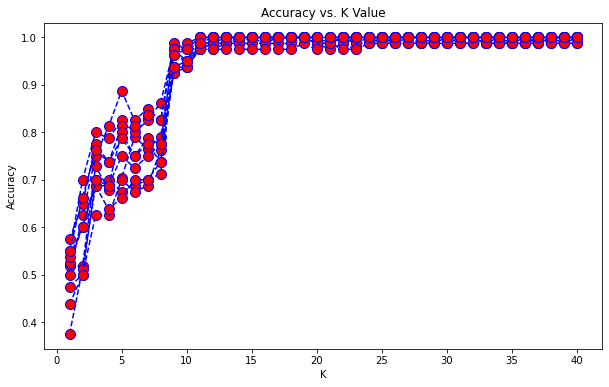

In [30]:
plt.figure(figsize=(10,6))
plt.plot(range(1,41),results,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

In [31]:
#Now that we consider k=10 (based on the graph) we can extract the best 10 features
featureSelection = SelectKBest(score_func=f_classif, k=10)
SelectedFeatures = featureSelection.fit_transform(scaled_features, y)

C:\Users\Asus\Anaconda3\envs\testenv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [    4    22  4369  4807  4808  4813  4815  4816  4830  5287  7660  7661
  7662  7663  7664  8120  9303  9305  9313  9315  9319  9451 10120 11957
 13990 14157 14158 14160 15137 15139 15140 15445 16565 16567 16568 16570
 16574 16577 16578 16603 16633 16636 16676 16696 16697 16698 16699 16700
 16701 16703 16704 16705 16706 16707 16708 16709 16710 16711 16712 16713
 16714 16715 16716 16717 16718 16719 16720 16721 16722 16723 16724 16725
 16726 16727 16728 16729 16730 16731 16732 16733 16734 16735 16736 16737
 16738 16739 16740 16741 16742 16743 16744 16745 16747 16748 16749 16750
 16751 16752 16753 16755 16756 16757 16758 16759 16760 16761 16762 16763
 16764 16765 16766 16767 16768 16769 16770 16771 16773 16774 16775 16776
 16777 16778 16779 16780 16781 16782 16784 16786 16787 16788 16789 16790
 16791 16793 16794 16795 16797 16798 16799 16800 16801 16802 168

In [32]:
#check the hyperparameters of the model
print(classifier.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': 2, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


In [33]:
#Tuning the model (first with RandomizedSearchCV)
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
# Create the random_grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [34]:
X_train, X_test, y_train, y_test = train_test_split(SelectedFeatures, y, test_size=0.25, random_state=42)

In [35]:
# Use the RandomizedSearchCV and GridSearchCV to search for best hyperparameters
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   45.8s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.6min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [36]:
rf_random.best_params_

{'n_estimators': 1400,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 80,
 'bootstrap': True}

In [37]:
#function to calculate the accuracy
def evaluate(model, test_features, test_labels):
    y_pred = model.predict(test_features)
    return accuracy_score(y_test, y_pred)

In [38]:
#testing the base model ie without the tuned hyperparameters
base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)
print(base_accuracy)

0.9751243781094527


In [39]:
#testing the model with the tuned hyperparameters
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)
print(random_accuracy)

0.9751243781094527


In [40]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.00%.


In [41]:
#Tuning model (now using more focused values that we got from RandomizedSearchCV to GridSearchCV)
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [90, 100, 110, 120],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [3, 5, 7],
    'n_estimators': [50, 100, 200, 300, 900]
}

rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [42]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 360 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 381 tasks      | elapsed:   34.6s
[Parallel(n_jobs=-1)]: Done 664 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1029 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  1.7min finished


{'bootstrap': True,
 'max_depth': 110,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'n_estimators': 50}

In [43]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)
print(grid_accuracy)

0.9751243781094527


In [44]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.00%.
